# Predicting Graduate Admissions Probability

In this project, we will evaluate and optimize the predictive power of a Gradient Boosted model that has been trained and tested on data collected from Master's program graduate admissions.

Citation:

* Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('data/Admission_Predict.csv')
data2 = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

data = pd.concat([data1, data2]).drop('Serial No.', axis = 1)
target = data['Chance of Admit ']
features = data.drop('Chance of Admit ', axis = 1)

In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Data Information

Variable Descriptions:
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose (out of 5)
* Letter of Recommendation Strength (out of 5)
* Cumulative GPA (ranging from 0 to 10)
* Research Experience (0 or 1)
* Chance of Admit (ranging from 0 to 1)

## Data Exploration

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            900 non-null int64
TOEFL Score          900 non-null int64
University Rating    900 non-null int64
SOP                  900 non-null float64
LOR                  900 non-null float64
CGPA                 900 non-null float64
Research             900 non-null int64
Chance of Admit      900 non-null float64
dtypes: float64(4), int64(4)
memory usage: 63.3 KB


In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


Check for any missing values.

In [7]:
data.isnull().values.any()

False

Our assumption prior to building a model is an increase in dependent variables would lead to an increase in our independent variable. Correlation coefficient measures the relationship between a pair of variables where, 

$$
r = \frac{n\sum{xy} - \sum{x}\sum{y}}{\sqrt{[n\sum{x^2} - (\sum{x})^2][n\sum{y^2} - (\sum{y})^2]}}
$$

The strength of the relationship is measured between [-1 , 1] with intervals $(0 , \pm 0.3)$, $(\pm 0.3, \pm 0.7)$ and $(\pm 0.7 , \pm 1)$ indicating weak, moderate, and strong correlation, respectively.
* Positive correlation when r > 0
* Negative correlation when r < 0
* No correlation when r = 0

In [8]:
corr = data.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.831137,0.650135,0.613269,0.538649,0.829021,0.570726,0.806873
TOEFL Score,0.831137,1.000000,0.669767,0.650534,0.552455,0.818476,0.476830,0.791934
University Rating,0.650135,0.669767,1.000000,0.730656,0.631142,0.723023,0.436357,0.699380
SOP,0.613269,0.650534,0.730656,1.000000,0.692200,0.714796,0.424001,0.680378
LOR,0.538649,0.552455,0.631142,0.692200,1.000000,0.651118,0.383256,0.655735
CGPA,0.829021,0.818476,0.723023,0.714796,0.651118,1.000000,0.509915,0.878284
Research,0.570726,0.476830,0.436357,0.424001,0.383256,0.509915,1.000000,0.548968
Chance of Admit,0.806873,0.791934,0.699380,0.680378,0.655735,0.878284,0.548968,1.000000


### Data Visualization

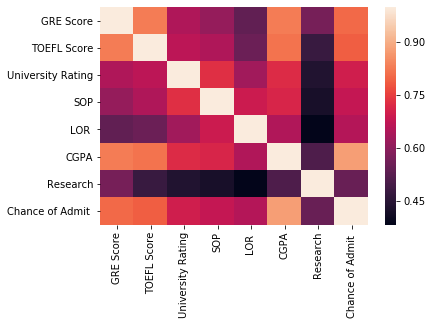

In [9]:
sns.heatmap(corr)

All independent variables indicate either moderate or strong positive correlation with the dependent variable (Chance of Admit). GRE Score and CGPA (Cumulative GPA) have the strongest correlation at .807 and 0.878 with Chance of Admissions.

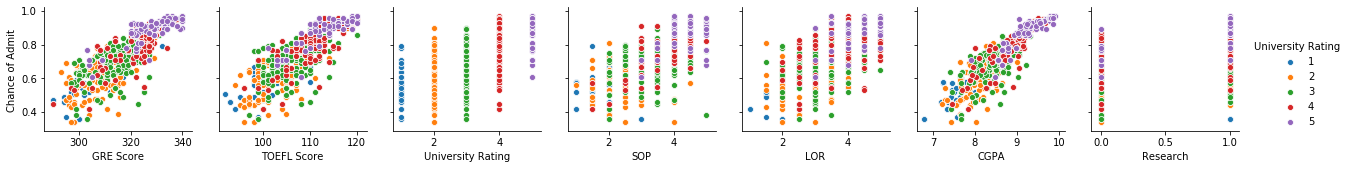

In [10]:
sns.pairplot(data, y_vars = ['Chance of Admit '], x_vars = features.columns, 
             hue='University Rating')

In addition to positive correlations between independent and dependent variables, we can visualize these interactions. By color coating University Rating, higher values in both the independent and dependent variables lead to a higher chance of admissions to higher rated universities.

## Training and Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 444)

## Model Building and Evaluation
For this project, we will use Gradient Boost to predict the Chance of Admission as well as optimize model parameters.

### Performance Metric

Our model performance metric to evaluate model fit will be $R^2$, which is the proportion of variance from the dependent variables that can be explained by the independent variable. $R^2$ metric ranged between 0 and 1 where 0 represents no variability that can be explained, while 1 represents perfect variability explained.

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_pred):  
    score = r2_score(y_true, y_pred)
    return score

### Baseline model

Establishing model parameters (slight alterations to default parameters) sets a basemodel for optimization to improve on.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rate = 0.1
n_estimators = 100
max_depth = 3
min_samples_split = 9
min_samples_leaf = 3
max_features = 'sqrt'
subsample = 0.8

gb = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators,
                               max_depth = max_depth, min_samples_split = min_samples_split,
                               min_samples_leaf = min_samples_leaf,max_features = max_features,
                               random_state = 444)
gb = gb.fit(X_train, y_train)

pred = gb.predict(X_test)
print("Our baseline model without tuning gave an R2 of {}".format(performance_metric(y_test, pred)))

Our baseline model without tuning gave an R2 of 0.8960216945205668


## Optimization

Parameters used in Gradient Boosting fall under the categories of
* Tree-based parameters : max_depth, min_samples_split, min_samples_leaf, max_features
* Boosting parameters : learning_rate, n_estimators, subsample

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def optimize(X, y, regressor, parameter, metric=performance_metric, n_jobs=-1):
    """
    Fits and computes optimized model given parameters
    """
    scorer = make_scorer(metric)
    cv = ShuffleSplit(X.shape[0], train_size=0.8, random_state=444)
    grid = GridSearchCV(regressor, parameter, scorer, n_jobs=n_jobs, cv=cv)
    grid = grid.fit(X, y)
    return grid.best_params_, grid.best_score_

def plot_optimization(regressor, parameter): 
    """
    Plots optimization score progression
    """
    train_results = []
    test_results = []
    
    for key in parameter.keys():
        temp_key = key
    
    for i in range(len(parameter[key])):
        new_dict = {key : parameter[key][i]}
        
        model = regressor.set_params(**new_dict) 
        model = model.fit(X_train, y_train)
    
        train_pred = model.predict(X_train)
        train_results.append(performance_metric(y_train, train_pred))
    
        test_pred = model.predict(X_test)
        test_results.append(performance_metric(y_test, test_pred))

    line1, = plt.plot(parameter[key], train_results, 'b', label='Train R^2')
    line2, = plt.plot(parameter[key], test_results, 'r', label='Test R^2')
    plt.ylabel('R^2 score')
    plt.xlabel(key)
    plt.legend()
    plt.grid()
    plt.show()

### Tune 1

n_estimators are the number of trees used for boosting. While learning_rate shrinks the contribution of each tree. As the number of trees increase, computation time increases as well as overfitting. n_estimators and learning_rate have an inverse relationship where more trees would result in a lower learning_rate and vice versa. This is because as more trees are used, gradual learning is possible. The opposite is when there are fewer trees, learning_rate is higher since each tree has more contriution to learning. In this case, I will keep learning_rate fixed and optimize for n_estimators.

In [16]:
optimize(X_train, y_train, regressor=gb, 
         parameter={'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100]})

({'n_estimators': 100}, 0.8283067812323589)

Using GridTuning, the model found n_estimators of 100 to be optimal. The model chooses the parameter that produces the highest $R^2$ score. Since increasing the number of estimators improves learning more trees would be used but increases computation time. We can therefore plot the number of estimators to $R^2$ score to find where additional trees do not improve model score.

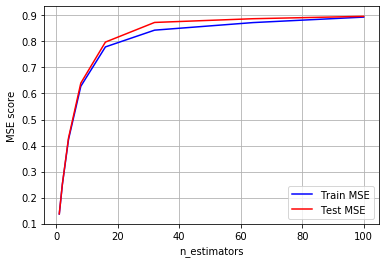

In [17]:
plot_optimization(regressor=gb, parameter={'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100]})

As n_estimators increase the $R^2$ score converges. This suggests that roughly between 32 and 75 trees is optimal. 

In [18]:
gb = gb.set_params(n_estimators=50)

### Tune 2

max_depth determines the length of each tree. As depth increases, variance decreases but bias increases. min_samples_splits is the minimum number of samples to split an internal node. Tuning both at the same time allows for optimal decision nodes for each tree.

In [19]:
optimize(X_train, y_train, regressor=gb, 
         parameter={'max_depth' : range(2, 12, 2),
                    'min_samples_split': range(6,18,2)})

({'max_depth': 10, 'min_samples_split': 6}, 0.9019907218745997)

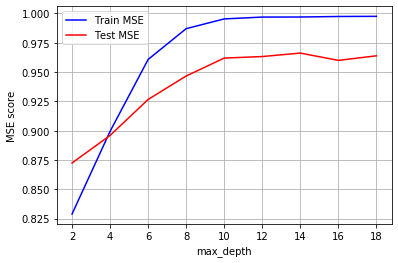

In [20]:
plot_optimization(regressor=gb, parameter={'max_depth' : range(2, 20, 2)})

Looking at the training and testing curves, a max_depth of 10 is where $R^2$ converges suggesting minimal change with additional nodes.

In [21]:
gb = gb.set_params(max_depth=10)

While keeping max_depth at 10, we can optimize min_samples_splits and min_samples_leaf together. 

### Tune 3

min_samples_leaf is the minimum number of samples used at each leaf node. Similar to min_samples_split, min_samples_leaf is used to control overfitting.

In [22]:
optimize(X_train, y_train, regressor=gb, parameter={'min_samples_split': range(6,18,2),
                                                    'min_samples_leaf': [3,5,7,9,12,15]})

({'min_samples_leaf': 3, 'min_samples_split': 6}, 0.9019907218745997)

The default parameter value was found to be optimal. With lower values, there is a higher chance of overfitting since each node requires a low number of samples to make decisions resulting in highly specific interations. With the number of observations and depth used this is fine.

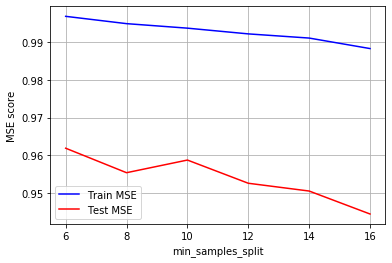

In [23]:
plot_optimization(regressor=gb, parameter={'min_samples_split':range(6,18,2)})

In [24]:
gb = gb.set_params(min_samples_split=6)

$R^2$ score decreases as min_samples_split increases. This is because each node requires more samples to make internal splits, lowing bias.

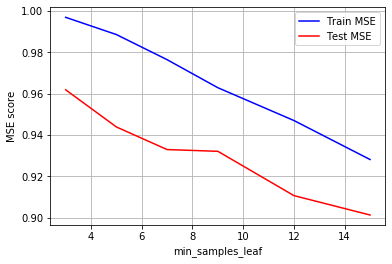

In [25]:
plot_optimization(regressor=gb, parameter={'min_samples_leaf': [3,5,7,9,12,15]})

Similar to min_samples_split, as min_samples_leaf increases $R^2$ increases.

In [26]:
gb = gb.set_params(min_samples_leaf=3)

As both min_samples_leaf and min_samples_split increase, $R^2$ score decreases. Since the model requires more samples to make decisions, this leads to an over generalization between variable relations, low variance and low bias.

### Tune 4

Selecting the number of features for the model to use attempts to reduce the dimensionality and complexity.

In [27]:
optimize(X_train, y_train, regressor=gb, parameter={'max_features' : range(1, 8)})

({'max_features': 3}, 0.9027901930257096)

GridSearch found that 3 feature was optimal, which is the max number of features.

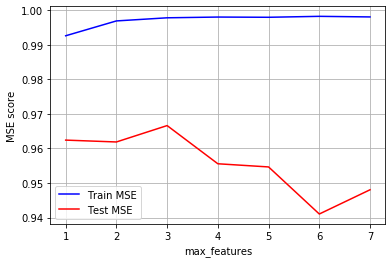

In [28]:
plot_optimization(regressor=gb, parameter={'max_features' : range(1, 8)})

In [29]:
gb = gb.set_params(max_features=3)

### Tune 5

After finding all major parameters, we can now optimize for subsample. subsample is used for determining the number of samples used for fitting individual base learners. Subsample leads to a reduction in variance and an increase in bias.

In [30]:
optimize(X_train, y_train, regressor=gb, parameter={'subsample' : [0.7,0.75,0.8,0.85,0.9,0.95]})

({'subsample': 0.95}, 0.9028339516895544)

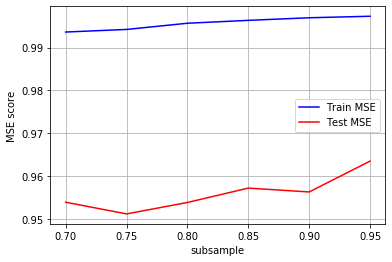

In [31]:
plot_optimization(regressor=gb, parameter={'subsample' : [0.7,0.75,0.8,0.85,0.9,0.95]})

In [32]:
gb = gb.set_params(subsample=0.95)

### Tune 6

To make the model more robust, we can reduce the learning_rate and increase the number of trees by varying proportions.

In [33]:
def robust_model(regressor, rates, trees):
    if len(rates) != len(trees):
        return 'invalid lengths'
    else:
        num = len(rates)
    
    results = []
    
    for i in range(num):
        regressor = regressor.set_params(learning_rate=rates[i], n_estimators=trees[i])
        regressor = regressor.fit(X_train, y_train)

        pred = regressor.predict(X_test)
        results.append({np.round(performance_metric(y_test, pred), decimals=5) : [rates[i], trees[i]]})
    return results

In [34]:
robust_model(gb, rates=[0.05, 0.01, 0.005, 0.005], trees=[100, 500, 1000, 1500])

[{0.95981: [0.05, 100]},
 {0.96146: [0.01, 500]},
 {0.96114: [0.005, 1000]},
 {0.96305: [0.005, 1500]}]

There was a decrease in our performance metric at learning_rate 0.005 and n_estimators 1280. We can increase the number of trees slightly, improving our performance metric from ~0.95981 to ~0.96305.

In [35]:
gb = gb.set_params(learning_rate=0.005, n_estimators=1500)

## Final Model

Gradient Boost Regressor parameters:
* learning_rate : 0.005
* n_estimators : 1500
* max_depth : 10
* min_samples_split : 6
* min_samples_leaf : 3
* max_features : 3
* subsample : 0.95

In [36]:
gb = gb.fit(X_train, y_train)

pred = gb.predict(X_test)
print('Rsquare score of {}'.format(np.round(performance_metric(y_test, pred), decimals=5)))

Rsquare score of 0.96305


## Evaluation

### Feature Importance

Text(0, 0.5, 'Importance Score')

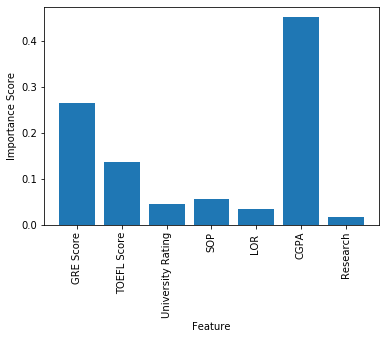

In [37]:
plt.bar(features.columns, gb.feature_importances_)
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance Score')

### Conclusions

Reiterating what our performance metric measures, $R^2$ is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words, the proportion between total variance explained by the model and the total variance. With an $R^2$ score of 0.96305, the variance explained by the model almost perfectly matches the total variance found in the data.

As for implementation and interpretation of the model results, the model is able to predict the chance of admission given these dependent variables. Looking at the feature importance model, the most important variables that result in a higher chance of admissions are CGPA, GRE Score, and TOEFL Score. These variables influence a large proportion to being accepted to graduate school. As for the remaining dependent variables, compared to the others mentioned, are not as influential.